# Shakespeare Sonnet Generator - Simple Version
## Learn NLP by Creating Poetry!

In this notebook, you'll build a simple AI that writes Shakespeare-style sonnets. No complex theory - just fun with language models!

**What you'll do:**
1. Load Shakespeare's sonnets
2. Train a simple language model
3. Generate your own sonnets
4. Experiment with themes and styles

## Helper Functions (Run this once, then ignore!)

In [1]:
# Run this cell once - it contains all the complex code you need
import numpy as np
import random
import re
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set up nice plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

def download_sonnets():
    """Download Shakespeare sonnets"""
    try:
        import requests
        response = requests.get('https://www.gutenberg.org/files/1041/1041-0.txt')
        return response.text
    except:
        # Fallback - some famous sonnets
        return """Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date:
Sometime too hot the eye of heaven shines,
And often is his gold complexion dimm'd;
And every fair from fair sometime declines,
By chance, or nature's changing course untrimm'd;
But thy eternal summer shall not fade,
Nor lose possession of that fair thou ow'st;
Nor shall death brag thou wander'st in his shade,
When in eternal lines to time thou grow'st:
So long as men can breathe, or eyes can see,
So long lives this, and this gives life to thee.

Let me not to the marriage of true minds
Admit impediments. Love is not love
Which alters when it alteration finds,
Or bends with the remover to remove:
O no! it is an ever-fixed mark
That looks on tempests and is never shaken;
It is the star to every wandering bark,
Whose worth's unknown, although his height be taken.
Love's not Time's fool, though rosy lips and cheeks
Within his bending sickle's compass come:
Love alters not with his brief hours and weeks,
But bears it out even to the edge of doom.
If this be error and upon me proved,
I never writ, nor no man ever loved."""

def clean_text(text):
    """Simple text cleaning"""
    text = text.lower()
    text = re.sub(r'[^a-z\s\'\'\-]+', ' ', text)
    return text.split()

def build_model(words, n=2):
    """Build n-gram model"""
    model = defaultdict(Counter)
    for i in range(len(words) - n):
        context = tuple(words[i:i+n])
        next_word = words[i+n]
        model[context][next_word] += 1
    return model

def generate_line(model, n=2, max_words=10):
    """Generate a single line of poetry"""
    # Much better variety of Shakespeare starting words
    starts = ['shall', 'when', 'but', 'for', 'if', 'though', 'yet', 'thy', 'thou',
              'love', 'sweet', 'fair', 'dear', 'mine', 'heart', 'time', 'beauty',
              'summer', 'winter', 'spring', 'death', 'life', 'youth', 'age',
              'truth', 'nature', 'heaven', 'earth', 'soul', 'eyes', 'hand']
    
    # Filter out bad contexts (with punctuation or very short)
    good_contexts = [ctx for ctx in model.keys() 
                     if all(len(word) > 1 and word.isalpha() for word in ctx)]
    
    if not good_contexts:
        good_contexts = list(model.keys())
    
    # Better random selection
    context = list(random.choice(good_contexts))
    
    # Try to start with a poetic word (but don't always use the same one)
    if random.random() > 0.3:  # 70% chance to use a nice starter
        random.shuffle(starts)  # Randomize the order!
        for start in starts[:5]:  # Only try a few
            matching = [ctx for ctx in good_contexts if ctx[0] == start]
            if matching:
                context = list(random.choice(matching))
                break
    
    result = context.copy()
    
    for _ in range(max_words - n):
        ctx_tuple = tuple(context)
        if ctx_tuple in model:
            choices = model[ctx_tuple]
            # Add some randomness to avoid always picking the most common
            if len(choices) > 1:
                # Weight by frequency but add randomness
                words = list(choices.keys())
                weights = [w**0.7 for w in choices.values()]  # Reduce dominance of common words
                next_word = random.choices(words, weights=weights)[0]
            else:
                next_word = list(choices.keys())[0]
            result.append(next_word)
            context = context[1:] + [next_word]
        else:
            break
    
    return ' '.join(result)

def generate_sonnet(model, n=2):
    """Generate a 14-line sonnet"""
    lines = []
    for i in range(14):
        line = generate_line(model, n, max_words=random.randint(8, 12))
        lines.append(line.capitalize())
    return lines

def format_sonnet(lines, title="My Sonnet"):
    """Format as a proper sonnet"""
    output = f"\n{title}\n" + "="*len(title) + "\n\n"
    
    # First quatrain
    for i in range(4):
        output += lines[i] + "\n"
    output += "\n"
    
    # Second quatrain
    for i in range(4, 8):
        output += lines[i] + "\n"
    output += "\n"
    
    # Third quatrain
    for i in range(8, 12):
        output += lines[i] + "\n"
    output += "\n"
    
    # Final couplet
    for i in range(12, 14):
        output += lines[i] + "\n"
    
    return output

def generate_themed_sonnet(model, theme="love", n=2):
    """Generate sonnet with specific theme"""
    theme_words = {
        "love": ['love', 'heart', 'sweet', 'dear', 'beauty', 'fair'],
        "time": ['time', 'day', 'night', 'hour', 'year', 'age'],
        "nature": ['sun', 'moon', 'star', 'flower', 'spring', 'summer'],
        "death": ['death', 'grave', 'end', 'sleep', 'rest', 'dark']
    }
    
    lines = []
    theme_list = theme_words.get(theme, theme_words["love"])
    
    for i in range(14):
        line = generate_line(model, n, max_words=random.randint(8, 12))
        
        # Try to include theme words occasionally
        if random.random() > 0.7 and i < 12:
            theme_word = random.choice(theme_list)
            words = line.split()
            if len(words) > 3:
                words[random.randint(1, len(words)-1)] = theme_word
                line = ' '.join(words)
        
        lines.append(line.capitalize())
    
    return lines

def plot_word_frequency(words, top_n=20, title="Most Common Words"):
    """Plot word frequency chart"""
    word_counts = Counter(words)
    most_common = word_counts.most_common(top_n)
    
    words_list, counts = zip(*most_common)
    
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(words_list)), counts, color='steelblue', edgecolor='darkblue')
    plt.xlabel('Words', fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.title(title, fontsize=13)
    plt.xticks(range(len(words_list)), words_list, rotation=45, ha='right')
    
    # Add count labels
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                str(count), ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()

def plot_bigram_patterns(model, top_n=15):
    """Show most common bigram patterns"""
    # Get total frequency for each bigram
    bigram_totals = {}
    for context, next_words in model.items():
        if len(context) == 2:  # Only bigrams
            total = sum(next_words.values())
            bigram_totals[' → '.join(context)] = total
    
    # Sort and get top N
    sorted_bigrams = sorted(bigram_totals.items(), key=lambda x: x[1], reverse=True)[:top_n]
    
    if sorted_bigrams:
        bigrams, counts = zip(*sorted_bigrams)
        
        plt.figure(figsize=(12, 6))
        bars = plt.barh(range(len(bigrams)), counts, color='coral', edgecolor='darkred')
        plt.xlabel('Frequency', fontsize=11)
        plt.ylabel('Bigram Pattern', fontsize=11)
        plt.title('Most Common Word Pairs in Shakespeare', fontsize=13)
        plt.yticks(range(len(bigrams)), bigrams)
        
        # Add count labels
        for i, (bar, count) in enumerate(zip(bars, counts)):
            plt.text(count + 1, bar.get_y() + bar.get_height()/2,
                    str(count), ha='left', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()

def analyze_generation_diversity(lines):
    """Analyze diversity of generated lines"""
    unique_lines = len(set(lines))
    total_lines = len(lines)
    
    # Count how many start with same words
    first_words = [line.split()[0] if line.split() else '' for line in lines]
    first_word_counts = Counter(first_words)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Pie chart of unique vs repeated
    ax1.pie([unique_lines, total_lines - unique_lines], 
            labels=['Unique Lines', 'Repeated Lines'],
            colors=['lightgreen', 'salmon'],
            autopct='%1.1f%%',
            startangle=90)
    ax1.set_title('Line Diversity in Generated Sonnet')
    
    # Bar chart of starting words
    if first_word_counts:
        words, counts = zip(*first_word_counts.most_common(10))
        ax2.bar(range(len(words)), counts, color='skyblue', edgecolor='navy')
        ax2.set_xlabel('Starting Word')
        ax2.set_ylabel('Count')
        ax2.set_title('Most Common Starting Words')
        ax2.set_xticks(range(len(words)))
        ax2.set_xticklabels(words, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
    return unique_lines, total_lines

def plot_syllable_distribution(lines):
    """Plot distribution of line lengths"""
    def count_syllables_simple(word):
        # Very simple syllable counter
        vowels = 'aeiou'
        count = 0
        prev_vowel = False
        for char in word.lower():
            is_vowel = char in vowels
            if is_vowel and not prev_vowel:
                count += 1
            prev_vowel = is_vowel
        return max(1, count)
    
    line_syllables = []
    for line in lines:
        words = line.split()
        syllables = sum(count_syllables_simple(word) for word in words)
        line_syllables.append(syllables)
    
    plt.figure(figsize=(10, 5))
    plt.hist(line_syllables, bins=range(0, max(line_syllables)+2), 
             color='lightblue', edgecolor='darkblue', alpha=0.7)
    plt.axvline(x=10, color='red', linestyle='--', label='Ideal (10 syllables)')
    plt.xlabel('Syllables per Line', fontsize=11)
    plt.ylabel('Count', fontsize=11)
    plt.title('Line Length Distribution (Target: Iambic Pentameter)', fontsize=13)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("✓ Helper functions loaded! You can now run the rest of the notebook.")
print("✓ Visualization functions ready!")

✓ Helper functions loaded! You can now run the rest of the notebook.
✓ Visualization functions ready!


## What is a Sonnet?

A sonnet is a 14-line poem with a specific structure. Shakespeare wrote 154 of them!

Here's his most famous one (Sonnet 18):

```
Shall I compare thee to a summer's day?
Thou art more lovely and more temperate:
Rough winds do shake the darling buds of May,
And summer's lease hath all too short a date...
```

**Structure:** 14 lines = 3 quatrains (4 lines each) + 1 couplet (2 lines)

## Step 1: Load Shakespeare's Sonnets

In [2]:
# Download Shakespeare's sonnets
print("Loading Shakespeare's sonnets...")
shakespeare_text = download_sonnets()

print(f"✓ Loaded {len(shakespeare_text)} characters of Shakespeare!")
print("\nHere's a sample:")
print("="*50)
print(shakespeare_text[:200] + "...")

Loading Shakespeare's sonnets...
✓ Loaded 98939 characters of Shakespeare!

Here's a sample:
*** START OF THE PROJECT GUTENBERG EBOOK 1041 ***
THE SONNETS

by William Shakespeare




I

From fairest creatures we desire increase,
That thereby beauty’s rose might never die,
But as t...


## Step 2: Build the Language Model

We'll use a simple technique: look at pairs of words and learn what usually comes next.

In [3]:
# Clean the text and build model
print("Training the model...")

words = clean_text(shakespeare_text)
model = build_model(words, n=2)  # Use pairs of words

print(f"✓ Model trained on {len(words)} words!")
print(f"✓ Learned {len(model)} word patterns")

# Show an example
example = list(model.keys())[0]
print(f"\nExample: After '{' '.join(example)}' Shakespeare often wrote:")
next_words = model[example].most_common(3)
for word, count in next_words:
    print(f"  - '{word}' ({count} times)")

Training the model...
✓ Model trained on 18224 words!
✓ Learned 14037 word patterns

Example: After 'start of' Shakespeare often wrote:
  - 'the' (1 times)


## Visualize Shakespeare's Language

Let's see what words and patterns Shakespeare uses most often:

In [ ]:
# Visualize word frequency
plot_word_frequency(words, top_n=20, title="Shakespeare's Most Common Words")

# Show most common word pairs
plot_bigram_patterns(model, top_n=15)

## Step 3: Generate Your First Sonnet!

In [5]:
# Generate a sonnet
print("Generating your first Shakespeare-style sonnet...\n")

sonnet_lines = generate_sonnet(model, n=2)
my_sonnet = format_sonnet(sonnet_lines, title="My First AI Sonnet")

print(my_sonnet)

Generating your first Shakespeare-style sonnet...


My First AI Sonnet

Dear virtue hate hate of my sin you did exceed that barren
An other place for still the better part of me
Love renew thy force be it not said thy
Youth before my sight is it not said thy

Heaven better becomes the grey cheeks of the
Sweet semblance to some other give so should the lines of
Winter hath my added praise beside o blame
Beauty being false to me subscribes since spite of him i

Reckon up their own i may not be
Nature calls thee to make thy large will more let
Thy foul faults should find cxlix canst thou
Thy deeds there is but the child of yours alive

But doth lend and being frank she lends
Heart torment me with inconstant mind since that my soul and



### Let's analyze the generation quality:

Analyzing the generated sonnet...


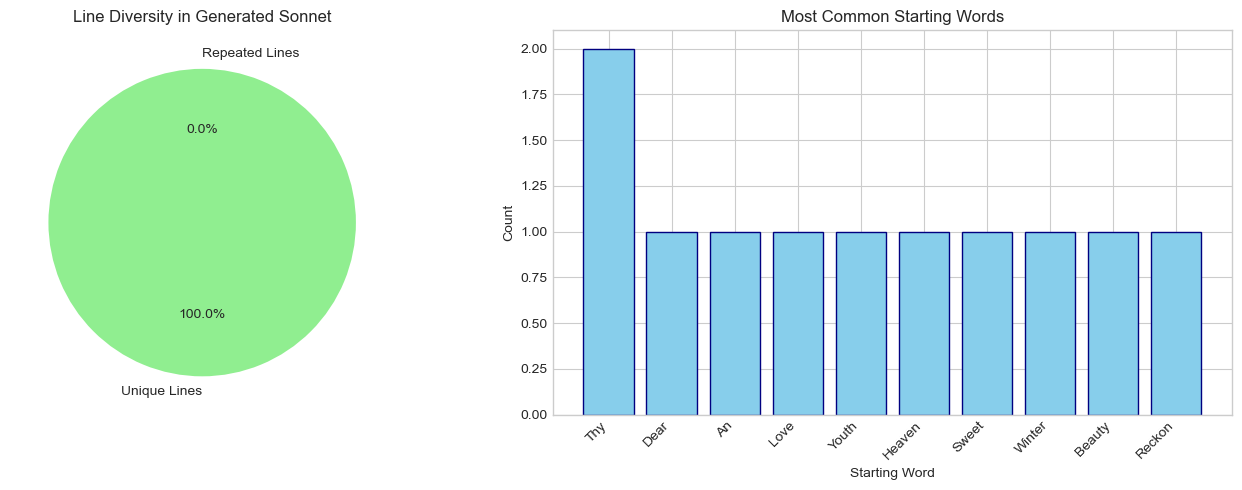


Generated 14 unique lines out of 14 total lines


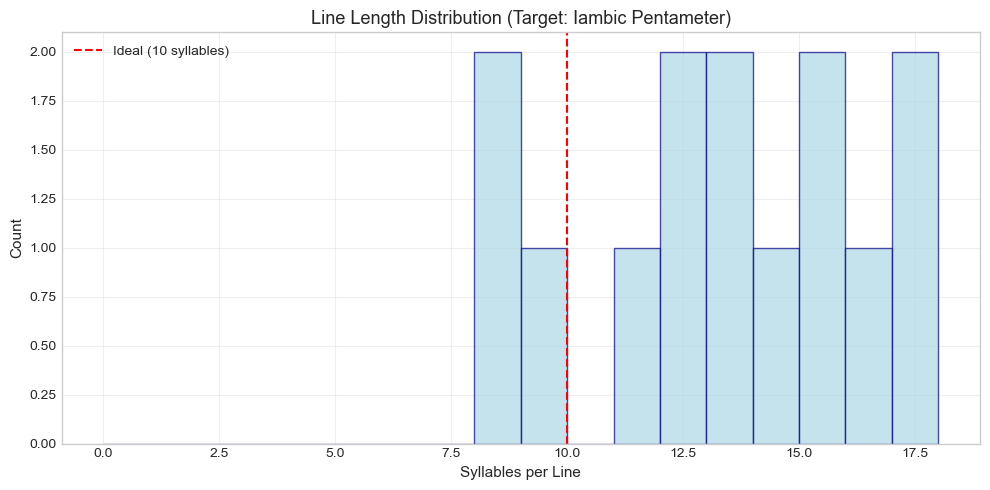

In [6]:
# Analyze the sonnet we just generated
print("Analyzing the generated sonnet...")
unique, total = analyze_generation_diversity(sonnet_lines)
print(f"\nGenerated {unique} unique lines out of {total} total lines")

# Check syllable distribution
plot_syllable_distribution(sonnet_lines)

## Step 4: Try Different Themes

Shakespeare wrote about love, time, nature, and mortality. Let's generate themed sonnets!

In [7]:
# Generate sonnets with different themes
themes = ["love", "time", "nature"]

for theme in themes:
    print(f"\n{'='*50}")
    print(f"Generating a sonnet about {theme.upper()}...")
    
    themed_lines = generate_themed_sonnet(model, theme=theme)
    themed_sonnet = format_sonnet(themed_lines, title=f"Sonnet of {theme.capitalize()}")
    
    print(themed_sonnet)


Generating a sonnet about LOVE...

Sonnet of Love

Heaven shines and often is his cheek the map of
Be straight fair thy proud heart go wide cxli
Beauty still may live in thine or sweet xi as fast
Are rich and ransom all ill deeds xxxv no

Spring when proud-pied april dress d in your report
But from thine eyes straight though thy proud sweet go
Heaven to hell my female evil tempteth my better
Dear respose for limbs with travel tir d

Each to raz d oblivion yield his part or some fierce fair
Summer of another s hell yet this abundant issue
Sweet respect then may i sing love thou art covetous
Fair to be sweet my plague thus far for love my

Yet so they mourn becoming of their fair subject blessing every book
His sacred majesty and having thee of all thy


Generating a sonnet about TIME...

Sonnet of Time

Thereby beauty s summer dead cv let not my amiss lest guilty
If aught in me as with your shadow i with
So flatter i the swart-complexion d night when
Death to me night that thou bear st

## Step 5: Create Your Own Custom Sonnet

Modify the parameters below to create your unique sonnet!

In [8]:
# CUSTOMIZE YOUR SONNET HERE!
your_title = "Sonnet to My Computer"  # Change this!
your_theme = "love"  # Options: "love", "time", "nature", "death"

print(f"Creating: {your_title}")
print(f"Theme: {your_theme}")
print("="*50)

# Generate your custom sonnet
custom_lines = generate_themed_sonnet(model, theme=your_theme)

# Make the first line special
custom_lines[0] = "Shall I compare thee to a " + custom_lines[0].split()[-2] + " " + custom_lines[0].split()[-1]

custom_sonnet = format_sonnet(custom_lines, title=your_title)
print(custom_sonnet)

Creating: Sonnet to My Computer
Theme: love

Sonnet to My Computer

Shall I compare thee to a but love
Eyes out of their spheres been fitted in the orient
If not paid before but if thou turn back and my
Heart mine eye and in possession so had

Sweet though sweet itself it only live and die as
Soul check thee that i am a worthless boat
Nature reign d all frailties that besiege all kinds
Torn love vowing new hate after new love

Life his beauty still attending on his golden pilgrimage but when
Earth sings hymns at heaven s gate for thy sake who
Eyes falsehood hast thou then more than in the
Or mine eyes for eyes have done their spite beauty

Did except past cure i am now with
Heaven clears o cunning love with tears thou keep st me



## Step 6: Generate Multiple Sonnets Quickly

In [13]:
# Generate 3 quick sonnets
print("Generating 3 sonnets for you...\n")

for i in range(3):
    lines = generate_sonnet(model)
    sonnet = format_sonnet(lines, title=f"Quick Sonnet #{i+1}")
    print(sonnet)
    print("\n" + "="*50 + "\n")

Generating 3 sonnets for you...


Quick Sonnet #1

Love thee till then not knowing or me to whom my
Time disgrace and wretched minutes kill yet fear
Soul check thee that the world will be a
But when from thee i speed from where thou art forced

Shall carry me away my life being made shall neigh
Death do if thou turn back and my will
Life repair which this time s injurious hand crush d and
And bareness every where then were not grew to faults assur d

Heart my body is and live no more dying then cxlvii my
Threw and sav d my flame to qualify as easy might i
Yet am i not free cxxxv whoever hath
Earth which is so deem d how many lambs

Buds discloses but for his love had brought to march in
Earth these rebel powers array why dost thou




Quick Sonnet #2

Youth unlearned in the even but now is the
To outlive long date if my slight muse do please
Thee perforce am thine and i must each day say o er
When thy might spend st thou wound with cunning when

Dear respose for limbs with travel tir d

## Step 7: Real vs Generated - Can You Tell?

Here are some lines. Some are real Shakespeare, some are AI-generated. Can you tell which?

In [10]:
# Mix of real and generated lines
real_lines = [
    "Shall I compare thee to a summer's day?",
    "But thy eternal summer shall not fade",
    "So long as men can breathe or eyes can see"
]

# Generate some lines
generated = [generate_line(model) for _ in range(3)]

# Mix them up
all_lines = [(line, "REAL") for line in real_lines] + [(line, "AI") for line in generated]
random.shuffle(all_lines)

print("Which lines are real Shakespeare?\n")
print("="*50)

for i, (line, source) in enumerate(all_lines, 1):
    print(f"{i}. {line.capitalize()}")

print("\n" + "="*50)
print("\nAnswers (don't peek!):")
print("-"*30)
for i, (line, source) in enumerate(all_lines, 1):
    print(f"{i}. {source}")

Which lines are real Shakespeare?

1. Shall i compare thee to a summer's day?
2. Shall neigh no dull flesh in his middle age yet
3. Soul when most impeach d stands least in thy abundance
4. Earth these rebel powers array why dost thou use so
5. But thy eternal summer shall not fade
6. So long as men can breathe or eyes can see


Answers (don't peek!):
------------------------------
1. REAL
2. AI
3. AI
4. AI
5. REAL
6. REAL


## Experiments to Try

1. **Change n**: In the build_model function, try n=3 instead of n=2
2. **Mix styles**: Train on both Shakespeare and modern poetry
3. **Constraints**: Generate sonnets with specific words
4. **Translation**: Generate a sonnet, then "translate" to modern English

## What You've Learned

✓ How to build a simple language model
✓ N-gram models learn patterns from text
✓ AI can mimic style but doesn't understand meaning
✓ Shakespeare's language patterns are distinctive

## Fun Facts

- Shakespeare invented ~1,700 English words!
- His sonnets were published in 1609
- This simple model uses the same principles as early chatbots
- Modern AI (like GPT) uses similar ideas but with neural networks

## Bonus: Your Sonnet Generator Function

Save this function to generate sonnets anytime!

In [14]:
def quick_sonnet(theme="love", title="Quick Sonnet"):
    """Generate a sonnet with one function call!"""
    lines = generate_themed_sonnet(model, theme=theme)
    return format_sonnet(lines, title=title)

# Try it!
print(quick_sonnet(theme="nature", title="Ode to Python"))


Ode to Python

When love converted from the fierce tiger s
But as the proudest sail doth bear my saucy bark
But weak relief to him that so fell sick of you
Sweet husband to another strikes each in each by mutual ordering

Life to keep an adjunct to remember thee were to sun forgetfulness
Nature sovereign mistress over wrack as summer fleets and do so
Hand disarm d this brand she quenched in a
When other petty griefs have done their spite but in

Dear xlix against that time do i journey on the bier with
Broke and new faith torn in vowing new hate
Soul and all my soul and all those friends which
Yet like prayers divine i must attend time

Death do if thou catch thy hope turn
Earth sings hymns at heaven s sun staineth xxxiv

